In [2]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/


mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!kaggle datasets download phucthaiv02/butterfly-image-classification

Dataset URL: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification
License(s): CC0-1.0
butterfly-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile

zip_ref = zipfile.ZipFile('/content/butterfly-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import pandas as pd
df=pd.read_csv("/content/Training_set.csv")


In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [7]:
df.head(2)

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS


In [8]:
len(df["label"].unique())

75

In [9]:
#demn amount of butterflies ngl

In [10]:
x=[]
y=df['label'].values

In [11]:
len(y)
#so now we have classification in terms of series as per images given

6499

In [16]:
#lets convert them into labels,apparently my bud net doesnt like words :)why?:
"""
Neural networks are mathematical models that work with numerical data. They learn
 by finding patterns and relationships in numbers. Words, on the other hand, are
 symbolic representations of concepts. To use words as input or output in a neural network,
 they need to be converted into a numerical format that the network can understand and process.

"""

'\nNeural networks are mathematical models that work with numerical data. They learn\n by finding patterns and relationships in numbers. Words, on the other hand, are \n symbolic representations of concepts. To use words as input or output in a neural network, \n they need to be converted into a numerical format that the network can understand and process.\n\n'

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y)
mapping=dict(zip(encoder.classes_,range(len(encoder.classes_))))

# print(mapping)
#now this looks good

In [13]:
#time for  creating input / x
path_to_image_folder="/content/train"
#working in google colab
X=[]
for x in df['filename']:
  X.append(cv2.imread(os.path.join(path_to_image_folder,x)))


array([[[ 31,  43,  25],
        [ 31,  43,  25],
        [ 29,  42,  26],
        ...,
        [ 23,  47,  35],
        [ 27,  53,  40],
        [ 33,  59,  46]],

       [[ 32,  44,  26],
        [ 29,  43,  25],
        [ 29,  42,  26],
        ...,
        [ 33,  59,  46],
        [ 38,  63,  53],
        [ 41,  69,  56]],

       [[ 30,  45,  24],
        [ 28,  45,  24],
        [ 27,  43,  25],
        ...,
        [ 42,  69,  59],
        [ 43,  72,  63],
        [ 48,  78,  67]],

       ...,

       [[ 61,  97,  61],
        [ 65, 103,  67],
        [ 63, 107,  68],
        ...,
        [ 24,  63,  41],
        [ 22,  66,  43],
        [ 21,  67,  44]],

       [[ 63,  98,  64],
        [ 69, 107,  71],
        [ 66, 110,  71],
        ...,
        [ 20,  64,  41],
        [ 20,  66,  43],
        [ 20,  68,  42]],

       [[ 69, 104,  70],
        [ 71, 109,  73],
        [ 68, 111,  74],
        ...,
        [ 19,  65,  42],
        [ 21,  68,  42],
        [ 21,  69,  43]]], dtype=uint8)
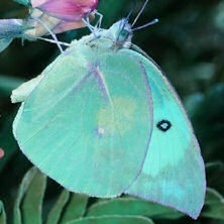

In [14]:
X[0]
#plt.show(X[0])
#she is pretty or maybe he idk.

#but now converting it into rgb (cv2fav)



array([[[ 25,  43,  31],
        [ 25,  43,  31],
        [ 26,  42,  29],
        ...,
        [ 35,  47,  23],
        [ 40,  53,  27],
        [ 46,  59,  33]],

       [[ 26,  44,  32],
        [ 25,  43,  29],
        [ 26,  42,  29],
        ...,
        [ 46,  59,  33],
        [ 53,  63,  38],
        [ 56,  69,  41]],

       [[ 24,  45,  30],
        [ 24,  45,  28],
        [ 25,  43,  27],
        ...,
        [ 59,  69,  42],
        [ 63,  72,  43],
        [ 67,  78,  48]],

       ...,

       [[ 61,  97,  61],
        [ 67, 103,  65],
        [ 68, 107,  63],
        ...,
        [ 41,  63,  24],
        [ 43,  66,  22],
        [ 44,  67,  21]],

       [[ 64,  98,  63],
        [ 71, 107,  69],
        [ 71, 110,  66],
        ...,
        [ 41,  64,  20],
        [ 43,  66,  20],
        [ 42,  68,  20]],

       [[ 70, 104,  69],
        [ 73, 109,  71],
        [ 74, 111,  68],
        ...,
        [ 42,  65,  19],
        [ 42,  68,  21],
        [ 43,  69,  21]]], dtype=uint8)
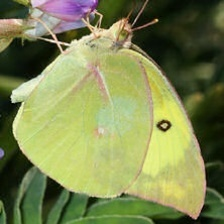

In [15]:
im=X[0]
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im
#looks good too , but blue flowers ahhhh

In [16]:
im.shape
#its size

(224, 224, 3)

In [17]:
for i in range(len(X)):
  X[i]=cv2.cvtColor(X[i],cv2.COLOR_BGR2RGB)


array([[[ 25,  43,  31],
        [ 25,  43,  31],
        [ 26,  42,  29],
        ...,
        [ 35,  47,  23],
        [ 40,  53,  27],
        [ 46,  59,  33]],

       [[ 26,  44,  32],
        [ 25,  43,  29],
        [ 26,  42,  29],
        ...,
        [ 46,  59,  33],
        [ 53,  63,  38],
        [ 56,  69,  41]],

       [[ 24,  45,  30],
        [ 24,  45,  28],
        [ 25,  43,  27],
        ...,
        [ 59,  69,  42],
        [ 63,  72,  43],
        [ 67,  78,  48]],

       ...,

       [[ 61,  97,  61],
        [ 67, 103,  65],
        [ 68, 107,  63],
        ...,
        [ 41,  63,  24],
        [ 43,  66,  22],
        [ 44,  67,  21]],

       [[ 64,  98,  63],
        [ 71, 107,  69],
        [ 71, 110,  66],
        ...,
        [ 41,  64,  20],
        [ 43,  66,  20],
        [ 42,  68,  20]],

       [[ 70, 104,  69],
        [ 73, 109,  71],
        [ 74, 111,  68],
        ...,
        [ 42,  65,  19],
        [ 42,  68,  21],
        [ 43,  69,  21]]], dtype=uint8)
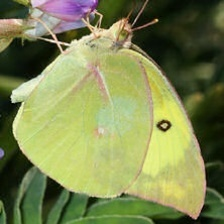

In [18]:
X[0]

In [19]:
len(X)
#are 6000 images enough?


6499

In [20]:
6499/75
#ik there isnt equal distribution , but ig its less , so we will do
# data augmentation

86.65333333333334

# Data augmentation

In [21]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import numpy as np

# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# X = np.array(X)

# aug_images = []
# for img in X:
#     img = np.expand_dims(img, axis=0)
#     augmented_batch = datagen.flow(img, batch_size=1)
#     for _ in range(2):
#         aug_images.append(next(augmented_batch)[0])

# aug_images = np.array(aug_images)

# print(aug_images.shape)


In [24]:
#apparently when i try to augment data , google colab crashes automatically
#and restarts ,sad life.

# Model Building


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size =
0.2, random_state = 42)


In [28]:
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

(5199, 224, 224, 3) (1300, 224, 224, 3) (5199,) (1300,)


((5199, 224, 224, 3), (1300, 224, 224, 3), (5199,), (1300,))

In [34]:
type(X_train)

numpy.ndarray

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Regularizer
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,Input
from tensorflow.keras import regularizers

In [48]:
model =Sequential()
model.add(Input(shape=(224, 224, 3)))

#conv layers
model.add(Conv2D(16, (5, 5), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_regularizer =
tf.keras.regularizers.l1_l2()))

model.add(Dense(128, activation = 'relu', kernel_regularizer =
tf.keras.regularizers.l1_l2()))
model.add(Dropout(0.2))
model.add(Dense(75, activation = 'softmax'))

In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 220, 220, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 106, 106, 32)   │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 53, 53, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 51, 51, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     5,120,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 75)             │         9,675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,178,859 (19.76 MB)

 Trainable params: 5,178,859 (19.76 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# with open("model_summary.txt", "w") as f:
#     model.summary(print_fn=lambda x: f.write(x + "\n"))
# from google.colab import files
# files.download('model_summary.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [52]:
history= model.fit(X_train, y_train, epochs = 20, batch_size = 32,
validation_data = (X_val, y_val))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0259 - loss: 11.9794

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


163/163 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.0259 - loss: 11.9426 - val_accuracy: 0.0669 - val_loss: 4.0920
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.1168 - loss: 3.7500 - val_accuracy: 0.2123 - val_loss: 3.3138
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.3131 - loss: 2.7735 - val_accuracy: 0.2785 - val_loss: 2.9464
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5517 - loss: 1.6793 - val_accuracy: 0.2877 - val_loss: 3.0577
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.7262 - loss: 0.9717 - val_accuracy: 0.3038 - val_loss: 3.4471
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8302 - loss: 0.5954 - val_accuracy: 0.3015 - val_loss: 3.9908
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9073 - loss: 0.3284 - val_accuracy: 0.3015 - val_loss: 4.3205
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9094 - loss: 0.3214 - val_accuracy: 0.

In [53]:
#less val_accuracy is due to low epochs ,u can use 100 or 200 to get better val_accuracy

In [54]:
hst=history

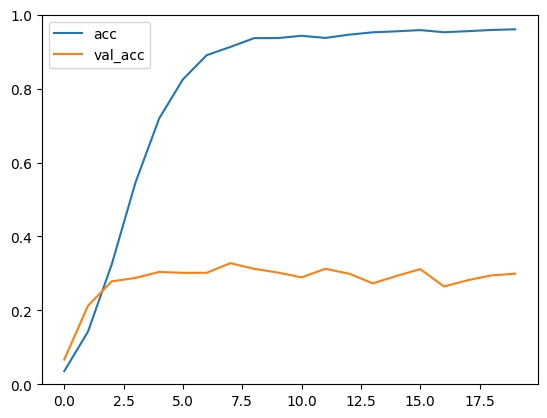

In [55]:
acc = hst.history['accuracy']
val_acc = hst.history['val_accuracy']
n = len(acc)
plt.ylim(0.0, 1.0)
plt.plot(acc, label='acc')
plt.plot(val_acc, label='val_acc')
plt.legend()

In [56]:
#gotta remove overfitting